# DSC 40B: Quick Select & Quick Sort

### By: Daniel Lee & Udaikaran Singh

In [1]:
#imports
import ipywidgets as widgets
import numpy as np
import time
import matplotlib.pyplot as plt
import random
from SortHelper import DisplayResults

## Quick Select Code

Quick Select is a simple, but interesting algorithm that allows us to find the k-th smallest value within a list (assuming k <= len(list)).

It is grouped in with Quick Sort, because it relies on a similar underlying idea, especially the idea of a partition.

The basic pseudo-code of the Quick-Select is:
    1. Pick a pivot (example: pick the first element of the list)
    2. If a value is greater than the pivot value, move it to the right of the pivot.
        - Else: move it to the left of the pivot.
    3. If there are more than k elements left of the pivot, then the k-th smallest element is left of the pivot.
        - Else: we know that the k-th smallest element is in the right of the pivot.
    4. With this new knowledge, we can ignore all the values to either the left or right of the partition and repeat the algorithm on the other side.

Trace through the code below to check your understanding

In [2]:
def quickselect(l, k, pivot_fn):
    if len(l) == 1:
        assert k == 0
        return l[0]

    pivot = pivot_fn(l)

    lows = [el for el in l if el < pivot]
    highs = [el for el in l if el > pivot]
    pivots = [el for el in l if el == pivot]

    if k < len(lows):
        return quickselect(lows, k, pivot_fn)
    elif k < len(lows) + len(pivots):
        # We found our k-th smallest element
        return pivots[0]
    else:
        #Note: we changed our k value, because we are ignoring the values below our pivot
        return quickselect(highs, k - len(lows) - len(pivots), pivot_fn)

Though we can find any k-th smallest element, quick select can very easily be applied to finding the median of a list.

In [3]:
def quickselect_median(l, pivot_fn=random.choice):
    if len(l) % 2 == 1:
        return quickselect(l, len(l) / 2, pivot_fn)
    else:
        return 0.5 * (quickselect(l, len(l) / 2 - 1, pivot_fn) +
                      quickselect(l, len(l) / 2, pivot_fn))

In [4]:
a = [1,3,3,4,5]
quickselect_median(a)

3

## Quick Sort Code

![quick Sort Animation](https://upload.wikimedia.org/wikipedia/commons/9/9c/Quicksort-example.gif)

Quick Sort performs similarly to Quick Select in that you pick a partition and then move values greater than the partition to the right, and values lower to the partition to the left. Then, we recursively apply the same operation to the left and right of the pivot.

Trace through the code below to confirm this.

In [5]:
def partition(array , low , high):
    i = low - 1
    pivot = array[high]
    
    for j in range( low , high):
        
        if array[j] <= pivot:
            
            i += 1
            array[i],array[j] = array[j],array[i] # Swapping 
    
    array[i+1],array[high] = array[high],array[i+1] 
    return(i+1)

def QuickSort(array,low,high, pivot_function = random.randint):
    if low < high:
        pivot = pivot_function(low,high)
        
        array[pivot] , array[high] = array[high], array[pivot] 
        
        mid = partition(array,low,high)
        QuickSort(array,low,mid-1)
        QuickSort(array,mid+1,high)

In [6]:
a = [1, 3, 2, 5, 7, 6, 8, 9, 4]
QuickSort(array= a, low= 0, high= len(a)-1)
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


## Average Performance vs. Worst Case

We will now explore the average vs. the worst runtime of the quicksort algorithm using repeated simulations.

In [7]:
results = []
for _ in range(1000):
    randomList = np.random.randint(1000, size = 1000)
    start = time.time()
    QuickSort(randomList, 0, len(randomList)-1)
    end = time.time()
    results.append(end - start)
    
sameVal = [1] * 1000
start = time.time()
QuickSort(sameVal, 0, len(sameVal) - 1)
end = time.time()
worstCase = end - start

### Runtime Distribution

Below is a histogram of 1000 simulated runtimes of quicksort on completely random input lists.

Average Runtime:  0.006191390752792359


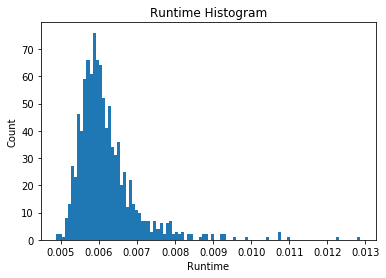

In [8]:
ax = plt.hist(results, bins = 100)
plt.title("Runtime Histogram")
plt.xlabel("Runtime")
plt.ylabel("Count")
print("Average Runtime: ", np.mean(results))

### Worst Case

Below is the same histogram as above but with an additional dashed vertical line corresponding to the worst-case simulated runtime of quicksort, in which we fed in a list of the same values. Our particular implementation of quicksort runs very slowly on such an input, since in each recursive call of the quicksort algorithm, all values are to one side of the pivot, resulting in an $O(n^2)$ runtime.

Average Runtime:  0.006191390752792359
Worst Case Runtime:  0.1009519100189209
This is 16x worse.


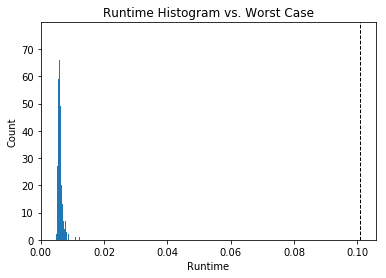

In [9]:
ax = plt.hist(results, bins = 100)
plt.title("Runtime Histogram vs. Worst Case")
plt.xlabel("Runtime")
plt.ylabel("Count")
plt.axvline(worstCase, color='k', linestyle='dashed', linewidth=1)
print("Average Runtime: ", np.mean(results))
print("Worst Case Runtime: ", worstCase)
print("This is " + str(int(worstCase/np.mean(results))) + "x worse.")

## Performance on Different Inputs

In [10]:
finResults = []
results = []
n = 100
iterations = 5000

for _ in range(iterations):
    randomList = np.random.randint(1000, size = n)
    start = time.time()
    QuickSort(randomList, 0, len(randomList)-1)
    end = time.time()
    delta = end-start
    results.append(delta)

finResults.append(results)

results = []
for _ in range(iterations):
    [1] * n
    start = time.time()
    QuickSort(randomList, 0, len(randomList)-1)
    end = time.time()
    delta = end-start
    results.append(delta)

finResults.append(results)

results = []
for _ in range(iterations):
    lst = list(range(n))
    start = time.time()
    QuickSort(lst, 0, len(lst)-1)
    end = time.time()
    delta = end-start
    results.append(delta)

finResults.append(results)

results = []
half = int((n/2))
for _ in range(iterations):
    lst = list(range(half)) + np.random.randint(1000, size = half)
    start = time.time()
    QuickSort(lst, 0, len(lst)-1)
    end = time.time()
    delta = end-start
    results.append(delta)

finResults.append(results)

In the histogram below, we can see the following rankings in runtimes with regards to input, from best to worst:
1. Half Sorted
2. Fully Sorted
3. Random Input
4. Constant Value

Note that the differences in performance across inputs are not as pronounced as the previous histogram, since the input size is 100 instead of 1000 as before.

<Figure size 2560x1920 with 0 Axes>

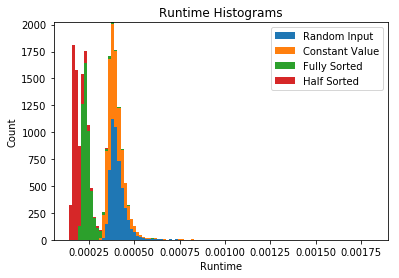

<Figure size 2560x1920 with 0 Axes>

In [11]:
labels = ['Random Input', "Constant Value", "Fully Sorted", "Half Sorted"]
ax = plt.hist(finResults, bins = 100, label = labels, stacked=True)
plt.legend()
plt.title("Runtime Histograms")
plt.xlabel("Runtime")
plt.ylabel("Count")
plt.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')

## Partitioning Methods

As you have seen above, Quick Sort performs differently based on the different types of inputs, and that the performance of Quick Sort can vary. The main downfall that may come with Quick Sort is picking a bad partition such that the left and right lists are highly unequal. The common way to pick this partition is with randomness, but it is not the only way to choose a partition.

Run the below cell and then pick any combination of partition methods and input sizes to test runtime performances with regards to partition method and input type!

In [13]:
FirstMethod = widgets.Dropdown(
    options=['Last Element', 'Random', "Median of Three"],
    value='Random',
    description='Method 1:',
)
SecondMethod = widgets.Dropdown(
    options=['Last Element', 'Random', "Median of Three"],
    value='Random',
    description='Method 2:',
)
Input_type = widgets.Dropdown(
    options=['Random', 'Sorted','First Half Sorted', "Partially Sorted"],
    value='Random',
    description='Input Type:',
)

print("Pick 2 Methods for Partitioning:")
display(FirstMethod)
display(SecondMethod)
print("Pick an Input Type:")
display(Input_type)
print("And then Run the Next Cell")

Pick 2 Methods for Partitioning:


Dropdown(description='Method 1:', index=1, options=('Last Element', 'Random', 'Median of Three'), value='Rando…

Dropdown(description='Method 2:', index=1, options=('Last Element', 'Random', 'Median of Three'), value='Rando…

Pick an Input Type:


Dropdown(description='Input Type:', options=('Random', 'Sorted', 'First Half Sorted', 'Partially Sorted'), val…

And then Run the Next Cell


Mean of Random Method:  0.0004501101970672607
Mean of Random Method:  0.0004313366413116455


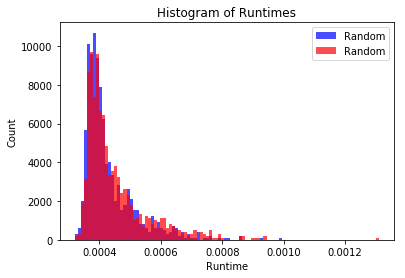

<Figure size 576x432 with 0 Axes>

In [13]:
ax, firstMean, secondMean = DisplayResults(FirstMethod.value, SecondMethod.value, Input_type.value)
print("Mean of " + FirstMethod.value +" Method: ", firstMean)
print("Mean of " + SecondMethod.value + " Method: ", secondMean)